## Setup

### Importing required libraries

In [2]:
pip install tensorflow-gpu

  Using cached tensorflow_gpu-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
Processing c:\users\narendr\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73\wrapt-1.12.1-py3-none-any.whl
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)

  Using cached protobuf-3.15.6-py2.py3-none-any.whl (173 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)
Processing c:\users\narendr\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorfl

In [6]:
%%time
from __future__ import division, print_function

# operating system interfaces
import os
import sys
import IPython
import IPython.display

# To use logging in the applications
import logging


# adding debugging module
import pdb
# For more information you can refer: https://web.stanford.edu/class/physics91si/2013/handouts/Pdb_Commands.pdf

# adding progress bar
!pip install tqdm==4.57.0
from tqdm import tqdm # !pip install tqdm==4.57.0
tqdm.pandas()

# libraries for data storage using np array and panel data of pandas. also library for scietific and statistical calculations
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import stats
from datetime import datetime

# to store objects as file
import pickle

# libraries for visaulization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# framework for deep learning
import tensorflow as tf
from tensorflow import keras

!python --version
print("TensorFlow version {}".format(tf.__version__))
print("Keras version {}".format(keras.__version__))

Python 3.8.3
TensorFlow version 2.4.1
Keras version 2.4.0
Wall time: 9.79 s


Instructions to use Debugger pdb:

*   n -> next (go to next line of code
*   c -> execute all the lines of code
*   u -> until (jump out of the loop) 
*   s -> step (step into the function)

Instructions to use Logger:

*   logging.debug('Debug message')
*   logging.info('Info message')
*   logging.warning('Warning message')
*   logging.error('Error message')
*   logging.critical('Critical message')


### Load Global Parameters

In [9]:
# changing working directory
work_dir = "D:/OneDrive - Jacobs University/Thesis/Master-Thesis"
data_dir = "D:/OneDrive - Jacobs University/Thesis/data"
os.chdir(work_dir)

# set file names to read
actual_generation_filename = data_dir + "/Actual_generation_202001010000_202012312359.csv"
phase_angle_filename = data_dir + "/All_2020-01-01T00_00_00.0-2020-12-31T23_59_59.9.csv"
afrr_filename = data_dir + "/Automatic_Frequency_Restoration_Reserve_202001010000_202012312359.csv"

mpl.rcParams['figure.figsize'] = (20, 7)
mpl.rcParams['axes.grid'] = False

# Gets or creates a logger
logger = logging.getLogger(__name__)

# set log level
logger.setLevel(logging.WARNING)

# define file handler and set formatter
file_handler = logging.FileHandler('logfile.log')
formatter    = logging.Formatter('%(asctime)s : %(levelname)s : %(name)s : %(message)s')
file_handler.setFormatter(formatter)

# add file handler to logger
logger.addHandler(file_handler)

In [10]:
from util.helperFunctions import *

imported function names:
*   read_csv_data_as_char(filename, sep=';', chunk_size = 10000)
*   convert_str_to_float(df, column_names)
*   convert_str_to_date(df)
*   plot_series(time, series, format="-", start=0, end=None, label=None)
*   plot_series_with_plotly(time, series, start=0, end=None, rangeslider = True)
*   plot_heatmap(df, col_name, v_min=None, v_max=None)



## Actual generation data

In [11]:
%time
# Read actual generation data
logging.info('Reading actual generation data between 2020-01-01 00:00:00 to 2020-12-31 23:45:00')

actual_generation_df = read_csv_data_as_char(actual_generation_filename)
logging.info('actual generation data was read sucessfully')

# cleaning and standardizing the data in "actual_generation"
logging.info('cleaning and standardizing the data in "actual_generation" dataframe')

# convert str type to date
actual_generation_df = convert_str_to_date(actual_generation_df)

# convert str type to int
actual_generation_df = convert_str_to_float(actual_generation_df, ["Wind offshore[MWh]", "Wind onshore[MWh]"])

# create month columns for analysis
actual_generation_df['Month'] = actual_generation_df.Datetime.dt.month

keep_cols = ["Wind offshore[MWh]", "Wind onshore[MWh]", "Datetime", "Month"]
actual_generation_df = actual_generation_df[keep_cols]

actual_generation_df['total_wind[MWh]'] = actual_generation_df["Wind offshore[MWh]"] + actual_generation_df["Wind onshore[MWh]"]
actual_generation_df['total_wind[MWh]'] = actual_generation_df['total_wind[MWh]']

del actual_generation_df['Wind offshore[MWh]']
del actual_generation_df['Wind onshore[MWh]']

logging.info('data cleaning and standardization was successully completed')

# save the df as .pickle
logging.info('save "actual_generation_df" dataframe as pickle for reusability')

actual_generation_df_pkl = open("actual_generation_df.pickle","wb")
pickle.dump(actual_generation_df, actual_generation_df_pkl)

logging.info('actual generation data was saved as "actual_generation_df.pickle"')

Wall time: 0 ns
Concatinating chunks of data into a signle dataframe
Actual_generation_202001010000_202012312359.csv is loaded into dataframe


In [5]:
actual_generation_df.head()

Datetime  Month  total_wind[MWh]
Datetime                                                       
2020-01-01 00:00:00 2020-01-01 00:00:00      1           1597.0
2020-01-01 00:15:00 2020-01-01 00:15:00      1           1596.0
2020-01-01 00:30:00 2020-01-01 00:30:00      1           1660.0
2020-01-01 00:45:00 2020-01-01 00:45:00      1           1721.0
2020-01-01 01:00:00 2020-01-01 01:00:00      1           1736.0

In [12]:
actual_generation_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35136 entries, 2020-01-01 00:00:00 to 2020-12-31 23:45:00
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Datetime         35136 non-null  datetime64[ns]
 1   Month            35136 non-null  int64         
 2   total_wind[MWh]  35136 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.1 MB


In [7]:
actual_generation_df.describe()

Month  total_wind[MWh]
count  35136.000000     35136.000000
mean       6.514458      3699.376907
std        3.451280      2674.327444
min        1.000000        32.000000
25%        4.000000      1464.750000
50%        7.000000      3072.000000
75%       10.000000      5443.000000
max       12.000000     11552.000000

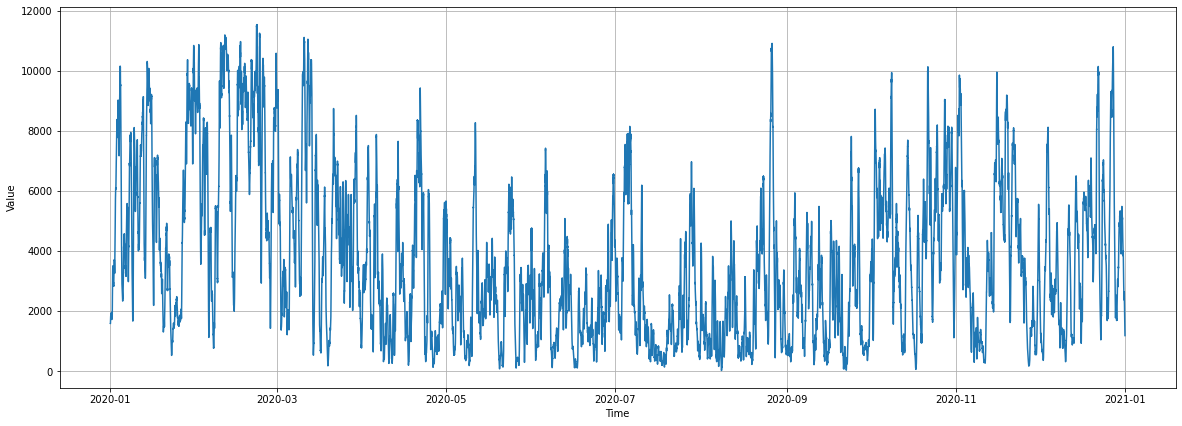

In [8]:
# plt.figure(figsize=(24, 10))
plot_series(actual_generation_df.index, actual_generation_df['total_wind[MWh]'])

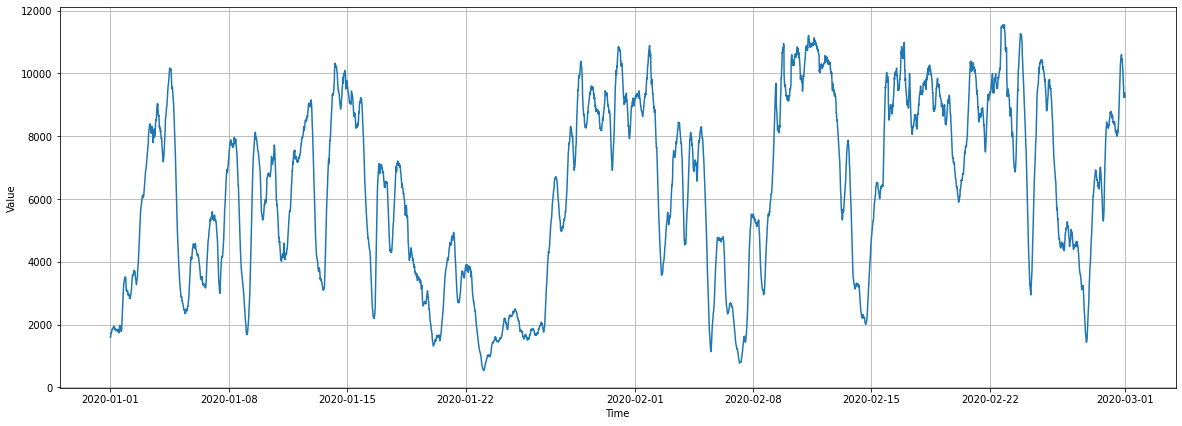

In [9]:
# plt.figure(figsize=(24, 10))
plot_series(actual_generation_df.loc['2020-01':'2020-02'].index, actual_generation_df.loc['2020-01':'2020-02']['total_wind[MWh]'])

# aFRR data

In [55]:
%time
# Read afrr data
logging.info('Reading Automatic Frequency Restoration Reserve data between')


afrr_df = read_csv_data_as_char(afrr_filename)
logging.info('aFRR data was read sucessfully')

# cleaning and standardizing the data in "actual_generation"
logging.info('cleaning and standardizing the data in "aFRR data" dataframe')

# convert str type to date
afrr_df = convert_str_to_date(afrr_df)

# convert str type to int
convert_str_to_float(afrr_df, ["Volume of activated balancing services (+)[MWh]", "Volume of activated balancing services (-)[MWh]"])

# create month columns for analysis
afrr_df['Month'] = afrr_df.Datetime.dt.month
afrr_df['Week'] = afrr_df.Datetime.dt.week

keep_cols = ["Volume of activated balancing services (+)[MWh]", "Volume of activated balancing services (-)[MWh]", "Datetime", "Month", "Week"]
afrr_df = afrr_df[keep_cols]

logging.info('data cleaning and standardization was successully completed')

# save the df as .pickle
logging.info('save "afrr_df" dataframe as pickle for reusability')

afrr_df_pkl = open("afrr_df.pickle","wb")
pickle.dump(afrr_df, afrr_df_pkl)

logging.info('afrr_df data was saved as "afrr_df.pickle"')

Wall time: 0 ns
Concatinating chunks of data into a signle dataframe
Automatic_Frequency_Restoration_Reserve_202001010000_202012312359.csv is loaded into dataframe


In [49]:
afrr_df.head()

Volume of activated balancing services (+)[MWh]  \
Datetime                                                               
2020-01-01 00:00:00                                             15.0   
2020-01-01 00:15:00                                              9.0   
2020-01-01 00:30:00                                              6.0   
2020-01-01 00:45:00                                              0.0   
2020-01-01 01:00:00                                             12.0   

                     Volume of activated balancing services (-)[MWh]  \
Datetime                                                               
2020-01-01 00:00:00                                             11.0   
2020-01-01 00:15:00                                              9.0   
2020-01-01 00:30:00                                              3.0   
2020-01-01 00:45:00                                              6.0   
2020-01-01 01:00:00                                              3.0   

                               Datetime  Month  Week  
Datetime                                              
2020-01-01 00:00:00 2020-01-01 00:00:00      1     2  
2020-01-01 00:15:00 2020-01-01 00:15:00      1     2  
2020-01-01 00:30:00 2020-01-01 00:30:00      1     2  
2020-01-01 00:45:00 2020-01-01 00:45:00      1     2  
2020-01-01 01:00:00 2020-01-01 01:00:00      1     2

In [56]:
afrr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35136 entries, 2020-01-01 00:00:00 to 2020-12-31 23:45:00
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Volume of activated balancing services (+)[MWh]  35136 non-null  float64       
 1   Volume of activated balancing services (-)[MWh]  35136 non-null  float64       
 2   Datetime                                         35136 non-null  datetime64[ns]
 3   Month                                            35136 non-null  int64         
 4   Week                                             35136 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.6 MB


In [57]:
afrr_df.describe().transpose()

count       mean  \
Volume of activated balancing services (+)[MWh]  35136.0  23.768414   
Volume of activated balancing services (-)[MWh]  35136.0  29.096795   
Month                                            35136.0   6.514458   
Week                                             35136.0  26.932377   

                                                       std  min   25%   50%  \
Volume of activated balancing services (+)[MWh]  45.451069  0.0   1.0   3.0   
Volume of activated balancing services (-)[MWh]  47.115788  0.0   2.0   7.0   
Month                                             3.451280  1.0   4.0   7.0   
Week                                             15.098692  1.0  14.0  27.0   

                                                  75%    max  
Volume of activated balancing services (+)[MWh]  26.0  507.0  
Volume of activated balancing services (-)[MWh]  36.0  475.0  
Month                                            10.0   12.0  
Week                                             40.0   53.0

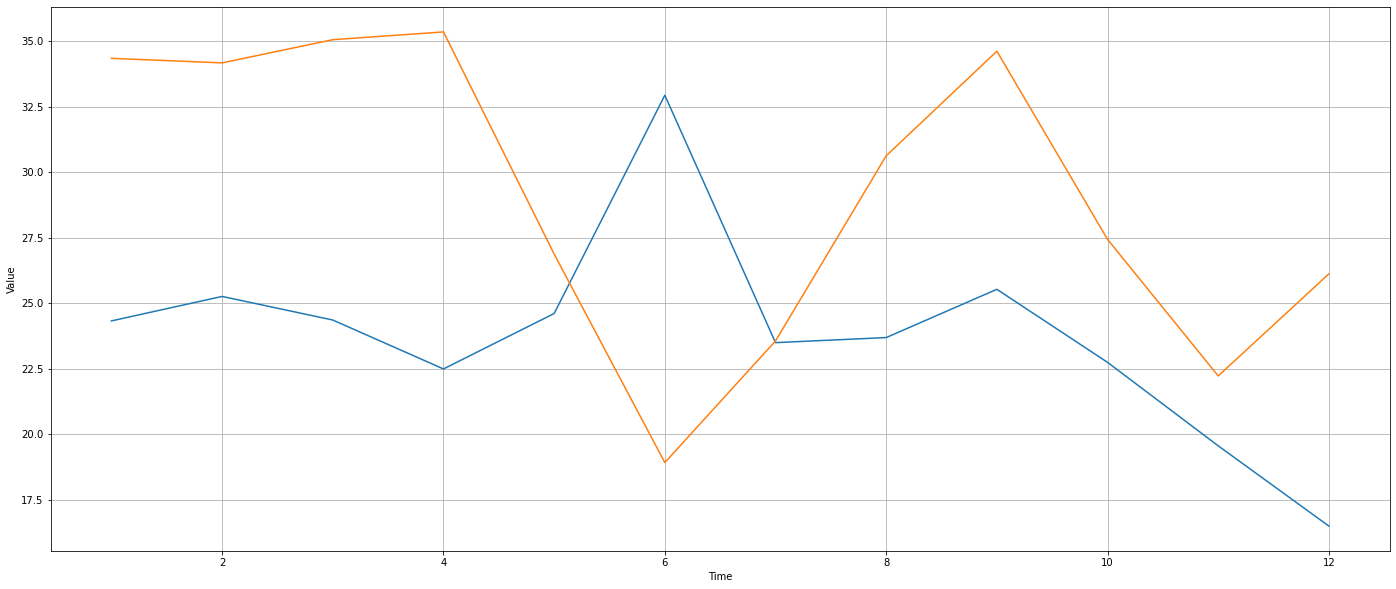

In [59]:
plt.figure(figsize=(24, 10))
plot_series(afrr_df['Month'].resample('1M').mean(), afrr_df['Volume of activated balancing services (+)[MWh]'].resample('1M').mean())
plot_series(afrr_df['Month'].resample('1M').mean(), afrr_df['Volume of activated balancing services (-)[MWh]'].resample('1M').mean())

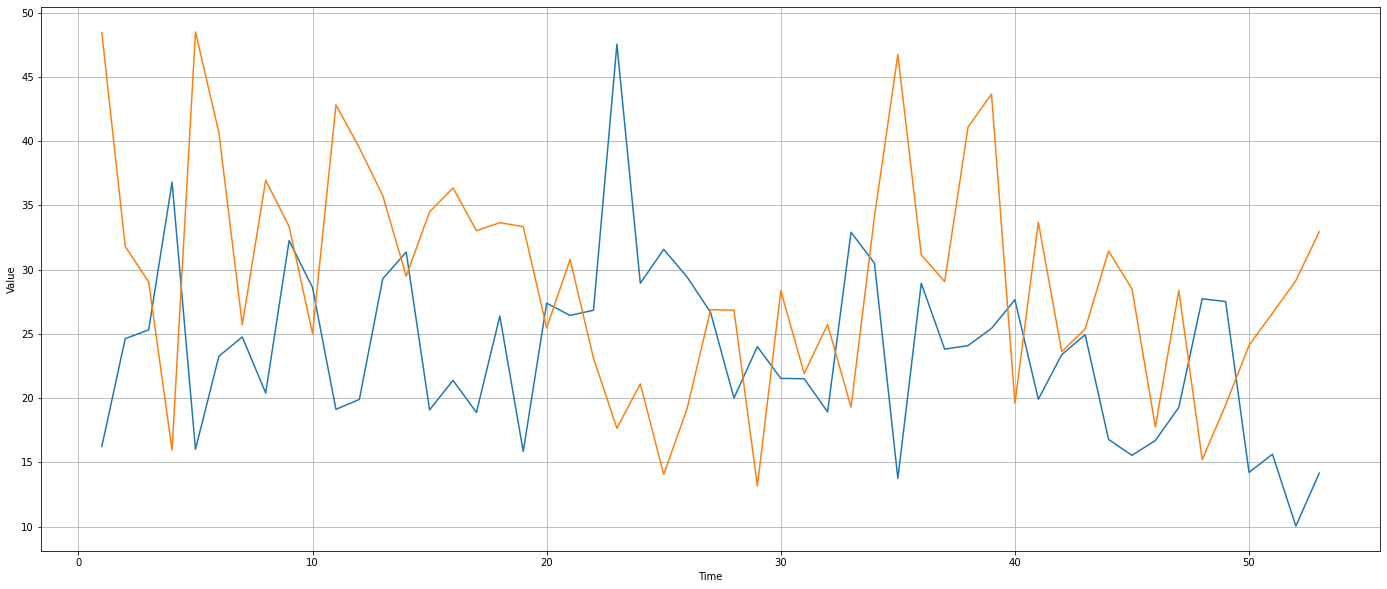

In [58]:
plt.figure(figsize=(24, 10))
plot_series(afrr_df['Week'].resample('1W').mean(), afrr_df['Volume of activated balancing services (+)[MWh]'].resample('1W').mean())
plot_series(afrr_df['Week'].resample('1W').mean(), afrr_df['Volume of activated balancing services (-)[MWh]'].resample('1W').mean())

It appears to be a seasonality of approxiamtely 5 weeks

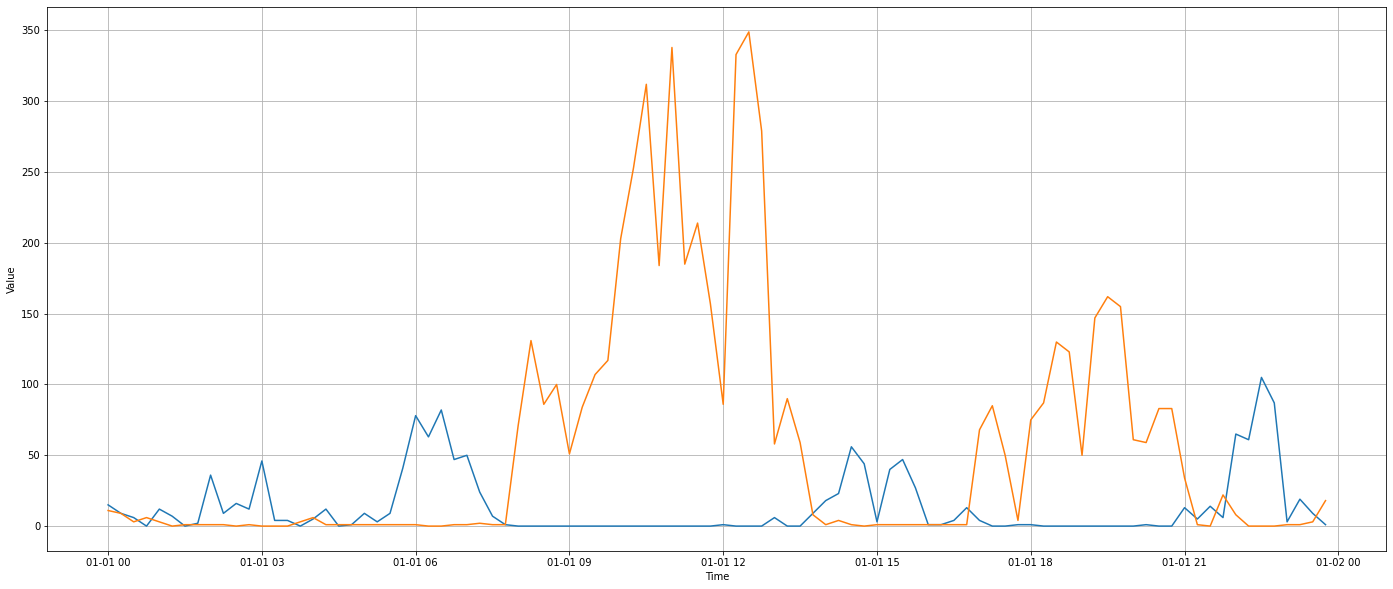

In [16]:
plt.figure(figsize=(24, 10))
plot_series(afrr_df.loc['2020-01-01'].index, afrr_df['Volume of activated balancing services (+)[MWh]'].loc['2020-01-01'])
plot_series(afrr_df.loc['2020-01-01'].index, afrr_df['Volume of activated balancing services (-)[MWh]'].loc['2020-01-01'])

In [60]:
plot_series_with_plotly(df = afrr_df, time = 'Datetime', col_name = 'Volume of activated balancing services (+)[MWh]')

In [61]:
plot_series_with_plotly(df = afrr_df, time = 'Datetime', col_name = 'Volume of activated balancing services (-)[MWh]')

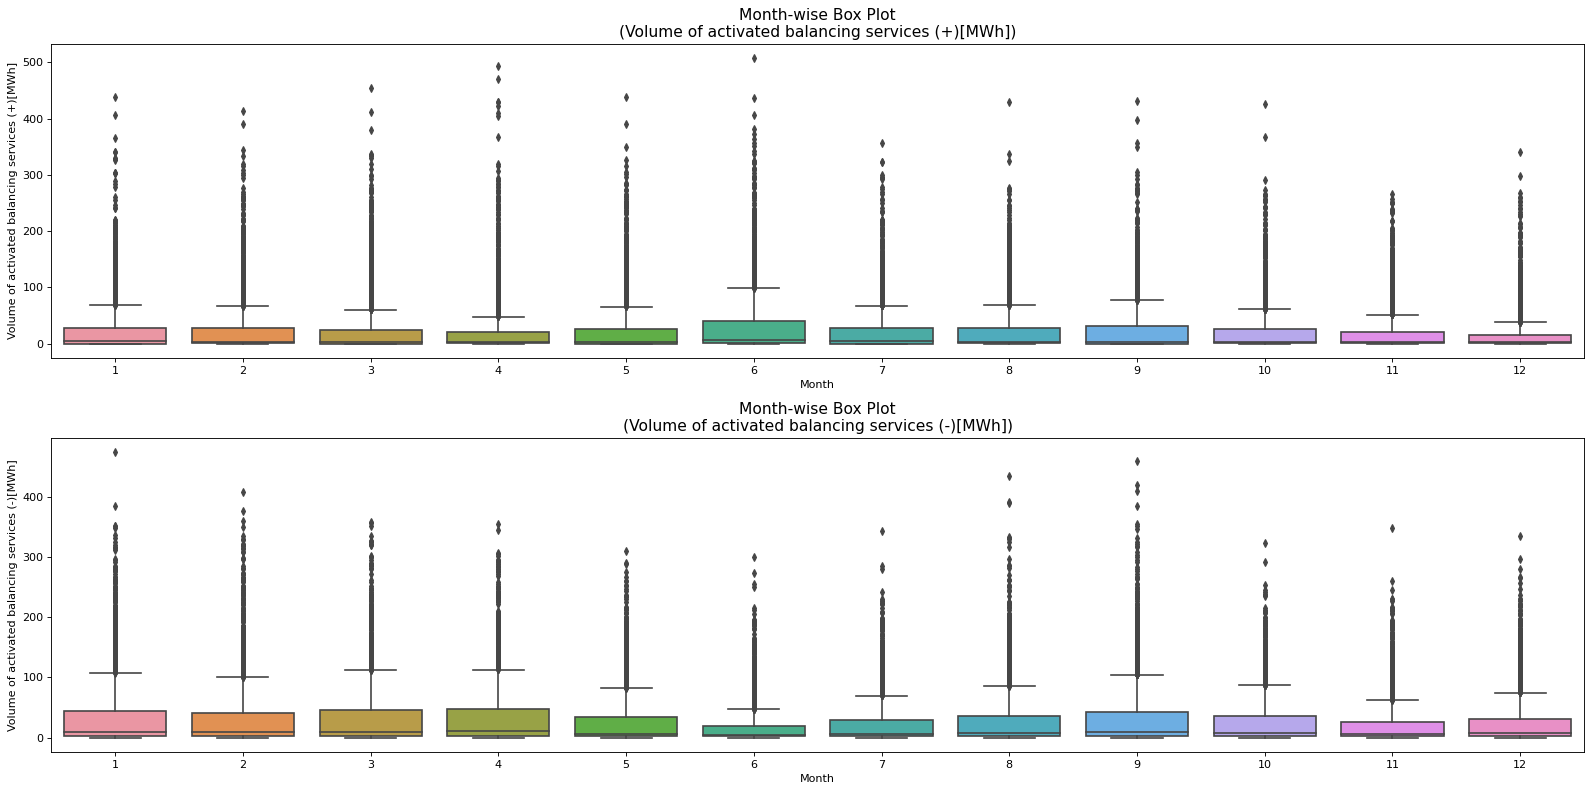

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(20,10), dpi= 80)
sns.boxplot(x = 'Month', y = 'Volume of activated balancing services (+)[MWh]', data=afrr_df, ax = axes[0])
sns.boxplot(x = 'Month', y = 'Volume of activated balancing services (-)[MWh]', data=afrr_df, ax = axes[1])
# Set Title
axes[0].set_title('Month-wise Box Plot\n(Volume of activated balancing services (+)[MWh])', fontsize=14); 
axes[1].set_title('Month-wise Box Plot\n(Volume of activated balancing services (-)[MWh])', fontsize=14)
fig.tight_layout()
plt.show()

**Explanation of above plot:**

*   The distribution of data is almost same in each month with few outliers



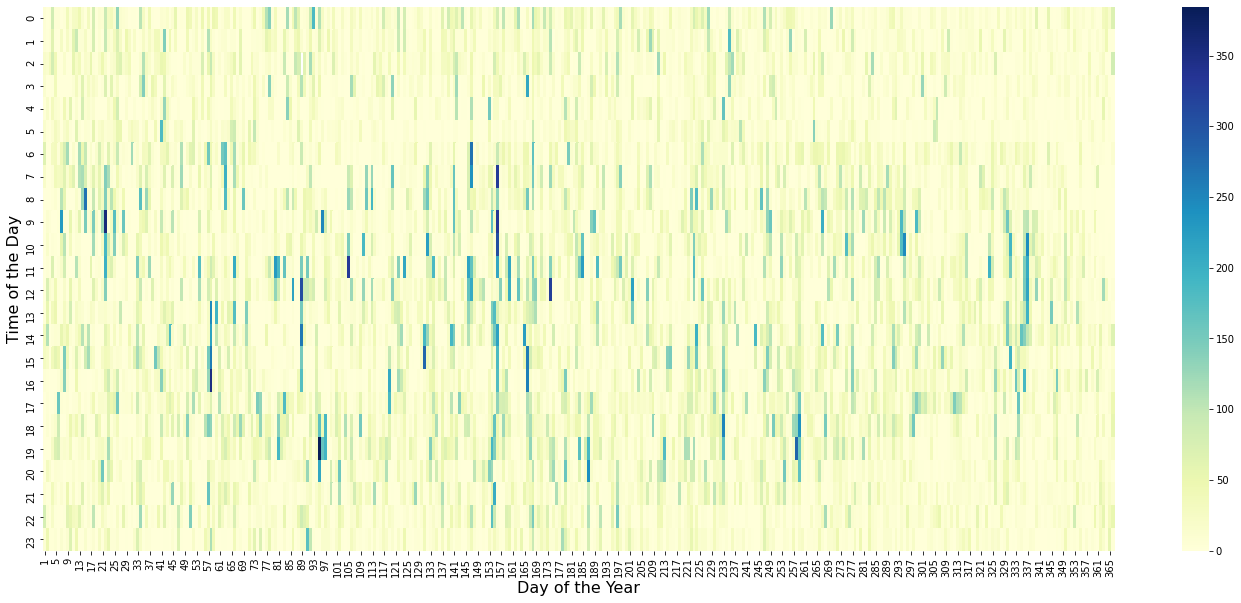

In [20]:
plot_heatmap(afrr_df, 'Volume of activated balancing services (+)[MWh]')

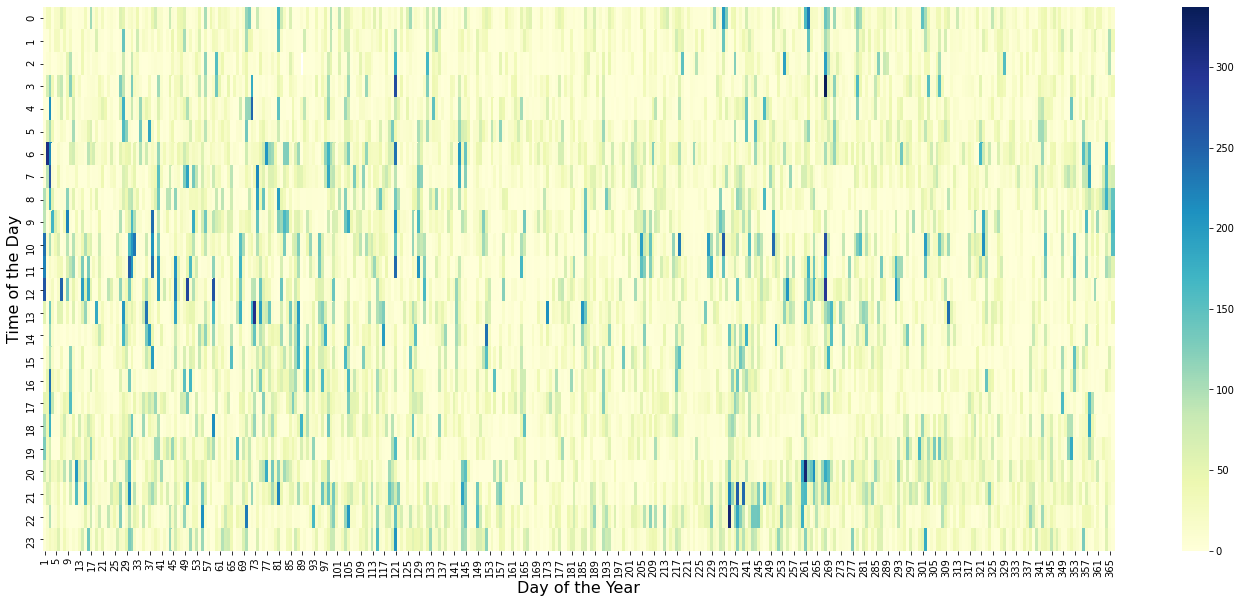

In [21]:
plot_heatmap(afrr_df, 'Volume of activated balancing services (-)[MWh]')

Text(0.5, 1.0, 'KDE')

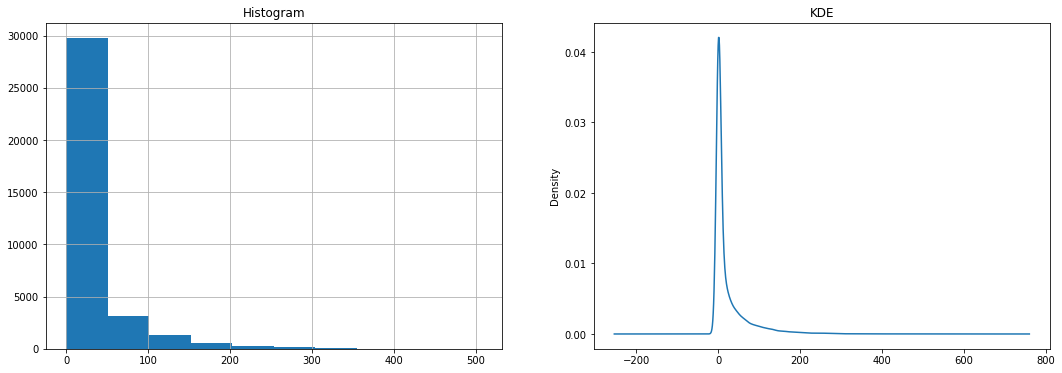

In [22]:
fig=plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
ax1=fig.add_subplot(1,2,1)
afrr_df['Volume of activated balancing services (+)[MWh]'].hist()
plt.title('Histogram')
ax2=fig.add_subplot(1,2,2)
afrr_df['Volume of activated balancing services (+)[MWh]'].plot(kind='density')# kernel density plot
plt.title('KDE')

In [23]:
stats.pearsonr(afrr_df['Volume of activated balancing services (+)[MWh]'], afrr_df['Volume of activated balancing services (-)[MWh]'])

(-0.28290314503407576, 0.0)

In [24]:
stats.spearmanr(afrr_df['Volume of activated balancing services (+)[MWh]'], afrr_df['Volume of activated balancing services (-)[MWh]'])

SpearmanrResult(correlation=-0.738470966825371, pvalue=0.0)

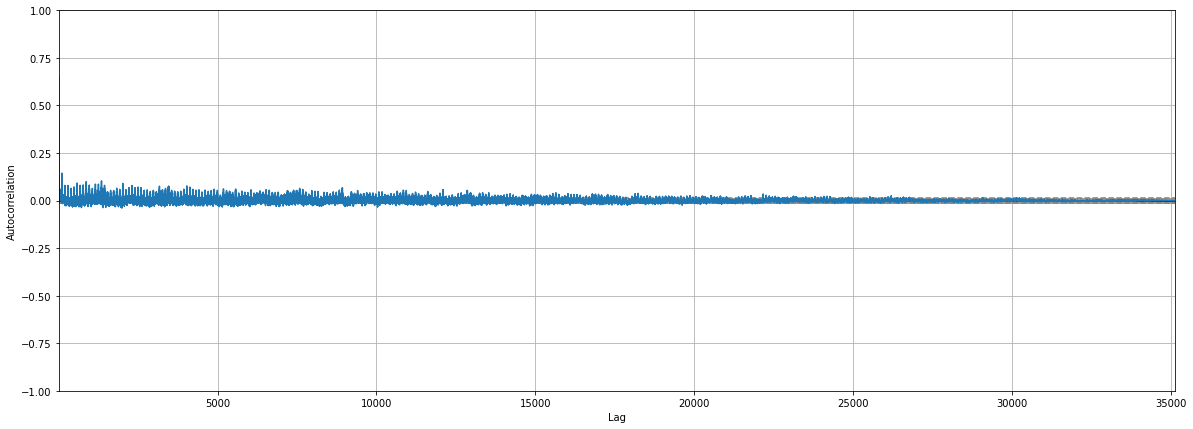

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(afrr_df['Volume of activated balancing services (+)[MWh]'])

Now that we have the time series, let's split it so we can start forecasting

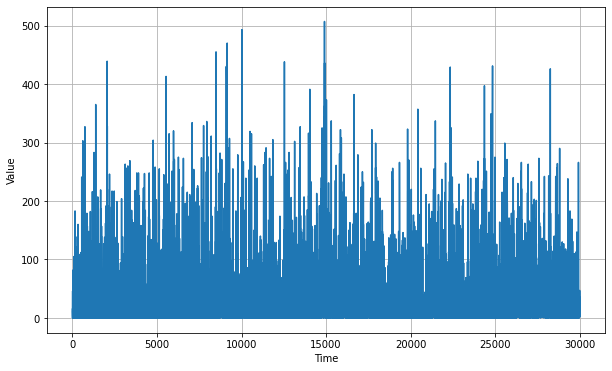

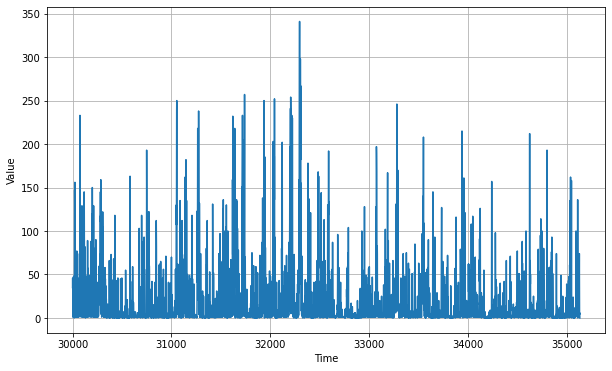

In [26]:
time = np.arange(len(afrr_df.Datetime))

series = afrr_df['Volume of activated balancing services (+)[MWh]']
series.reset_index(drop=True, inplace=True)

split_time = 30000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

# Forecasting techniques

### Naive Forecast

In [27]:
naive_forecast = series[split_time - 1:-1]

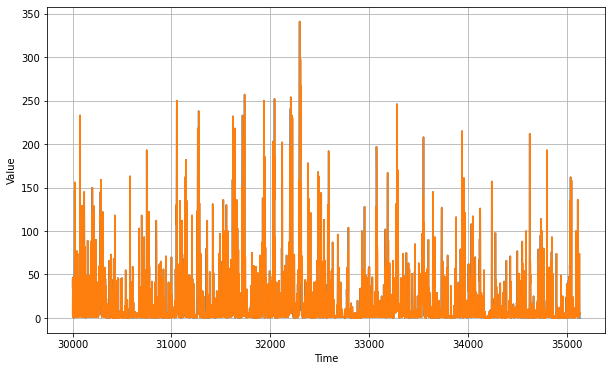

In [28]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

Let's zoom in on the start of the validation period:

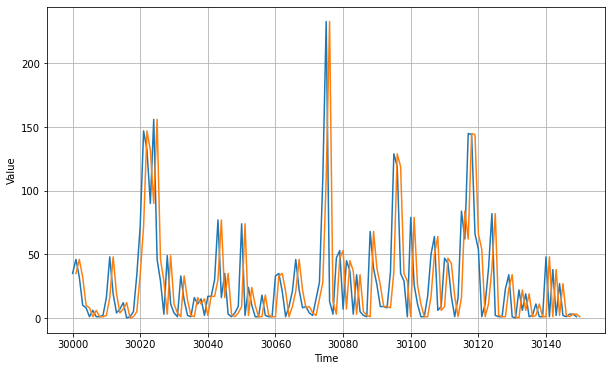

In [29]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

You can see that the naive forecast lags 1 step behind the time series.

Now let's compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period:

In [30]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

912.2496105919004
15.488317757009346


That's our baseline, now let's try a moving average:

### Moving Average

In [31]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

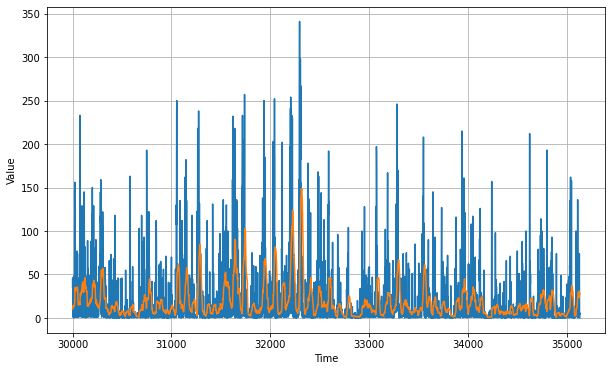

In [32]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [33]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

1224.4229132052615
20.804517133956388


That's worse than naive forecast! The moving average does not anticipate trend or seasonality, so let's try to remove them by using differencing. Since the seasonality period is 5 weeks, we will subtract the value at time *t* – 3360 from the value at time *t*.

Great, the trend and seasonality seem to be gone, so now we can use the moving average:

Better than naive forecast, good. However the forecasts look a bit too random, because we're just adding past values, which were noisy. Let's use a moving averaging on past values to remove some of the noise:

In [98]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [65]:
time = np.arange(len(afrr_df.Datetime))
series = afrr_df['Volume of activated balancing services (+)[MWh]']
series.reset_index(drop=True, inplace=True)

split_time = 30000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [97]:
x_train.shape, window_size, batch_size, shuffle_buffer_size

((30000,), 20, 32, 1000)

In [99]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>


In [66]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

print("Layer weights {}".format(l0.get_weights()))


<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>
Layer weights [array([[ 0.01997493],
       [ 0.00586672],
       [-0.00172946],
       [-0.00557911],
       [-0.01765124],
       [-0.05060179],
       [ 0.0333098 ],
       [ 0.0095638 ],
       [ 0.00598599],
       [-0.01315115],
       [ 0.00808042],
       [-0.03260976],
       [ 0.0106891 ],
       [ 0.0428999 ],
       [ 0.04286925],
       [-0.07868004],
       [ 0.12524988],
       [-0.03500671],
       [-0.06122546],
       [ 0.6419166 ]], dtype=float32), array([4.0626917], dtype=float32)]


In [124]:
series[time:time + window_size][np.newaxis,:].shape

(1, 20)

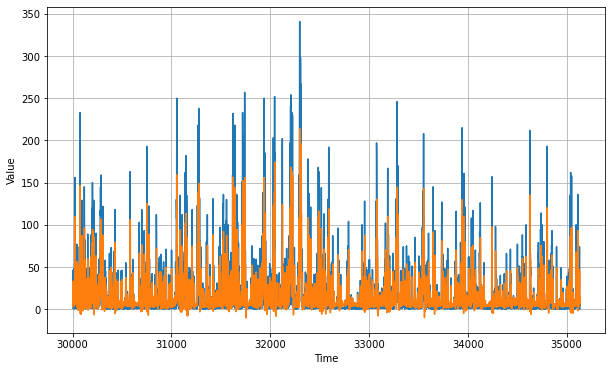

In [125]:
forecast = []

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis,:]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [127]:
print(keras.metrics.mean_squared_error(x_valid, results).numpy())
print(keras.metrics.mean_absolute_error(x_valid, results).numpy())

738.73987
14.9214115
